In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [2]:
data=pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### DataSet Description

##### InvoiceNo: 
Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

##### StockCode:
Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

##### Description:
Product (item) name. Nominal.

##### Quantity:
The quantities of each product (item) per transaction. Numeric.

##### InvoiceDate: 
Invice Date and time. Numeric, the day and time when each transaction was generated.

##### UnitPrice:
Unit price. Numeric, Product price per unit in sterling.

##### CustomerID:
Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

##### Country: 
Country name. Nominal, the name of the country where each customer resides.

In [3]:
print("Data Records : \n Rows : ",data.shape[0],"\n Columns :",data.shape[1])
print(" Duplicate Records : ",data.duplicated().sum())
data.drop_duplicates(inplace=True)

Data Records : 
 Rows :  541909 
 Columns : 8
 Duplicate Records :  5268


  ####  Null Values Summary

In [4]:
null_df = pd.DataFrame(data.dtypes).T.rename(index={0:"Column Type"})
null_df = pd.concat([null_df,pd.DataFrame(data.isna().sum()).T.rename(index={0:'null values'}),pd.DataFrame(data.isna().sum()/data.shape[0]*100).T.rename(index={0:'null values in %'})])
data.dropna(inplace=True)
null_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,datetime64[ns],float64,float64,object
null values,0,0,1454,0,0,0,135037,0
null values in %,0.0,0.0,0.270945,0.0,0.0,0.0,25.163377,0.0


In [5]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [6]:
df_countries = data[["Country","CustomerID","InvoiceNo"]].groupby(["Country","CustomerID","InvoiceNo"]).count().reset_index(drop=False)
print("No of countries in Data Frame : ",len(df_countries["Country"].value_counts()))

No of countries in Data Frame :  37


In [7]:
def Barplot(x,y,title="Title",xLabel="",yLabel="",rotate=0,figsize=(8,4),barLabel=True,palette="rainbow",orienation="v"):
    plt.figure(figsize=figsize)
    plt.xticks(rotation=rotate)
    plt.title(title,pad=10)
    plot = sns.barplot(x=x,y=y,palette=palette,orient=orienation)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    if barLabel:
        for i in plot.containers:
            plt.bar_label(i)
    plt.show()

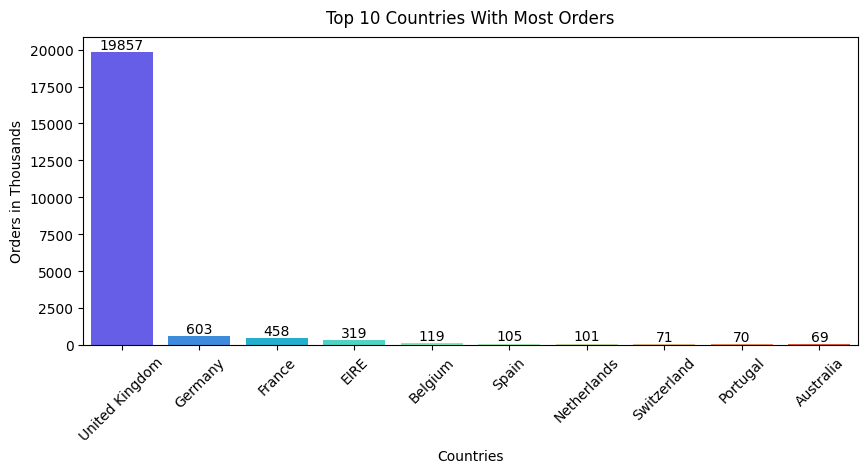

In [8]:
Barplot(x=df_countries["Country"].value_counts().index[:10],
        y=df_countries["Country"].value_counts().values[:10],
        title="Top 10 Countries With Most Orders",
        xLabel="Countries",
        yLabel="Orders in Thousands",
        figsize=(10,4),
        rotate=45)

,products,transactions,customers
quantity,3684,22190,4372


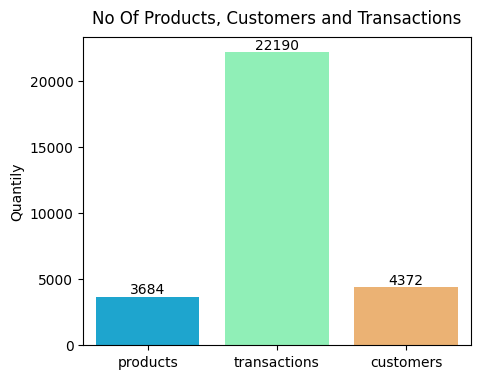

In [9]:
details_df = pd.DataFrame([{'products': len(data['StockCode'].value_counts()),    
               'transactions': len(data['InvoiceNo'].value_counts()),
               'customers': len(data['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

display(details_df)
print("\n")

Barplot(x=details_df.columns,
        y=details_df.values[0],
        title="No Of Products, Customers and Transactions",yLabel="Quantily",figsize=(5,4))


In [10]:
orders_per_basket  = data.groupby(["CustomerID","InvoiceNo"],as_index=False)["InvoiceDate"].count().rename(columns={"InvoiceDate":"No of Products"})
orders_per_basket[:10]

,CustomerID,InvoiceNo,No of Products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


In [11]:
orders_per_basket["Orders Cancelled"] = orders_per_basket["InvoiceNo"].apply(lambda x : int("C"==str(x)[0]))
orders_per_basket[:10]

,CustomerID,InvoiceNo,No of Products,Orders Cancelled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
5,12347.0,556201,18,0
6,12347.0,562032,22,0
7,12347.0,573511,47,0
8,12347.0,581180,11,0
9,12348.0,539318,17,0


In [12]:
print("No Of Orders Cancelled :",f"{orders_per_basket["Orders Cancelled"].sum()}/{len(orders_per_basket)}",
      f"({round(orders_per_basket["Orders Cancelled"].sum()/len(orders_per_basket)*100,2)}% )")

No Of Orders Cancelled : 3654/22190 (16.47% )


In [13]:
data.sort_values("CustomerID")[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347.0,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347.0,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland


In [14]:
df_check = data[data['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
count = 0
for index, col in  df_check.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) 
                & (data['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(' HYPOTHESIS NOT FULFILLED')
        if count==5:
            break
        count+=1

CustomerID      14527.0
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
 HYPOTHESIS NOT FULFILLED
CustomerID                             15311.0
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
 HYPOTHESIS NOT FULFILLED
CustomerID                            17548.0
Quantity                                  -12
StockCode                               22556
Description    PLASTERS IN TIN CIRCUS PARADE 
UnitPrice                                1.65
Name: 235, dtype: object
 HYPOTHESIS NOT FULFILLED
CustomerID                              17548.0
Quantity                                    -24
StockCode                                 21984
Description    PACK OF 12 PINK PAISLEY TISSUES 
UnitPrice                                  0.29
Name: 236, dtype: obje

In [15]:
df_cleaned = data.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = []
doubtful_entry = []

for index, col in data.iterrows():
    if col['Quantity'] > 0 or col['Description'] == 'Discount':
        continue 
    
    df_test = data[(data["CustomerID"] == col["CustomerID"]) &
                   (data["InvoiceNo"] == col["InvoiceNo"]) & 
                   (data["StockCode"] == col["StockCode"]) & 
                   (data["Quantity"] > 0) &
                   (data["InvoiceDate"] > col["InvoiceDate"])].copy()
    
    if df_test.shape[0] == 0: 
        doubtful_entry.append(index)
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break  